In [8]:
import os
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib_venn import venn3, venn3_circles

def save_pkl(data, path):
    with open(path, 'wb') as f:
        pickle.dump(data, f)


def load_pkl(path):
    with open(path, 'rb') as f:
        data = pickle.load(f)  # 단 한줄씩 읽어옴

    return data

In [9]:
#file_name =os.listdir('./pkl/cifar10')

cpp_type = 'imagenet_224_2'

file_name = os.listdir(f'./pkl/{cpp_type}')

for i in range(0, len(file_name)):
    file_name[i] = os.path.join(f'./pkl/{cpp_type}', file_name[i])

In [10]:
file_name

["./pkl/imagenet_224_2\\('bannister', 'freight car', 'lesser panda')_bannister_idx.pkl",
 "./pkl/imagenet_224_2\\('bannister', 'freight car', 'lesser panda')_freight car_idx.pkl",
 "./pkl/imagenet_224_2\\('bannister', 'freight car', 'lesser panda')_lesser panda_idx.pkl",
 "./pkl/imagenet_224_2\\('bow tie', 'frying pan', 'oboe')_bow tie_idx.pkl",
 "./pkl/imagenet_224_2\\('bow tie', 'frying pan', 'oboe')_frying pan_idx.pkl",
 "./pkl/imagenet_224_2\\('bow tie', 'frying pan', 'oboe')_oboe_idx.pkl",
 "./pkl/imagenet_224_2\\('broom', 'lion', 'steel arch bridge')_broom_idx.pkl",
 "./pkl/imagenet_224_2\\('broom', 'lion', 'steel arch bridge')_lion_idx.pkl",
 "./pkl/imagenet_224_2\\('broom', 'lion', 'steel arch bridge')_steel arch bridge_idx.pkl",
 "./pkl/imagenet_224_2\\('cliff dwelling', 'dam', 'plunger')_cliff dwelling_idx.pkl",
 "./pkl/imagenet_224_2\\('cliff dwelling', 'dam', 'plunger')_dam_idx.pkl",
 "./pkl/imagenet_224_2\\('cliff dwelling', 'dam', 'plunger')_plunger_idx.pkl",
 "./pkl/imag

In [11]:
part = []

for i in range(0, len(file_name), 3):
    part.append(file_name[i:i+3])

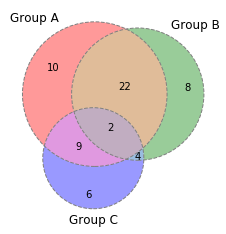

In [12]:
# Line style: can be 'dashed' or 'dotted' for example
v=venn3(subsets = (10, 8, 22, 6,9,4,2), set_labels = ('Group A', 'Group B', 'Group C'))
c=venn3_circles(subsets = (10, 8, 22, 6,9,4,2), linestyle='dashed', linewidth=1, color="grey")
plt.show()

In [13]:
len(part)

6

Class 0 : bannister
Class 1 : freight car
Class 2 : lesser panda
Class 0 : bow tie
Class 1 : frying pan
Class 2 : oboe
Class 0 : broom
Class 1 : lion
Class 2 : steel arch bridge
Class 0 : cliff dwelling
Class 1 : dam
Class 2 : plunger
Class 0 : desk
Class 1 : drumstick
Class 2 : oboe
Class 0 : dumbbell
Class 1 : police van
Class 2 : steel arch bridge


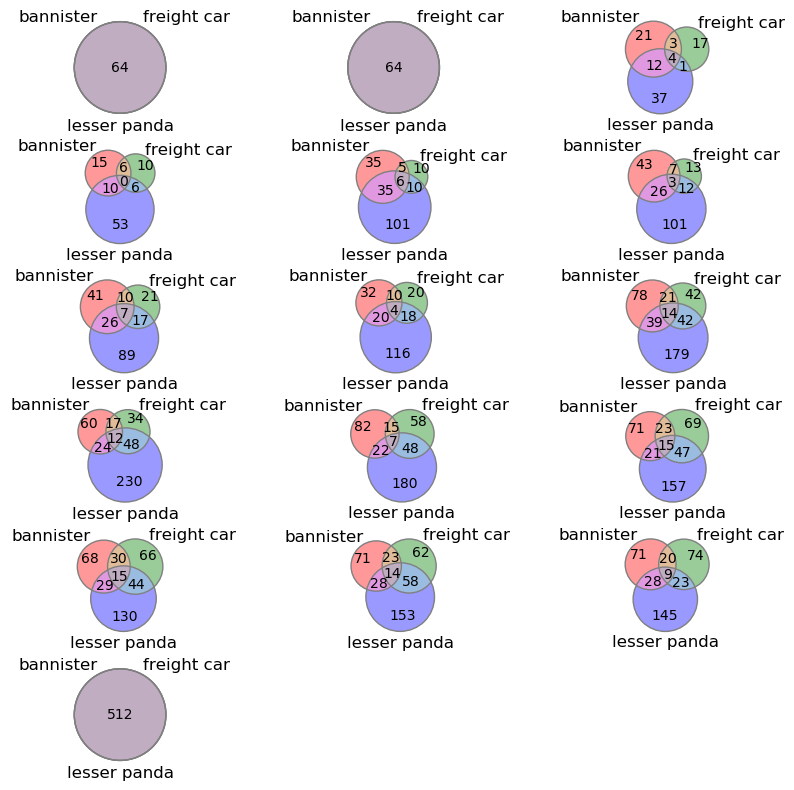

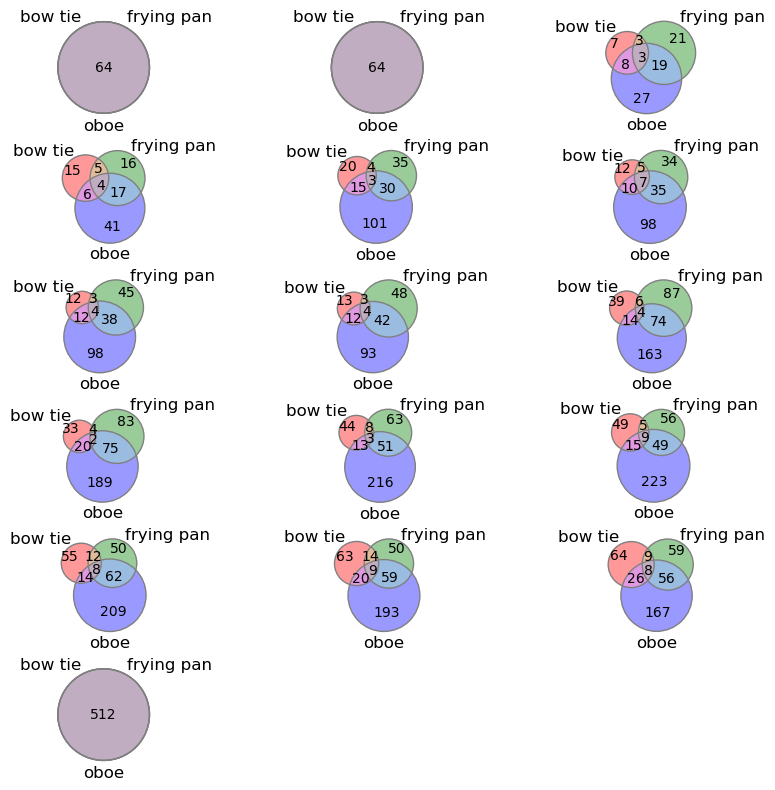

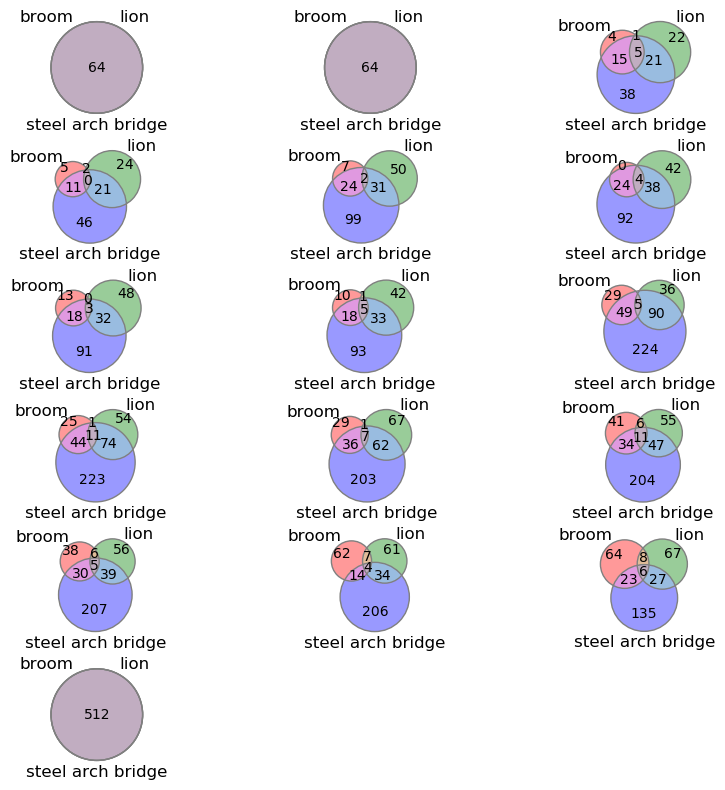

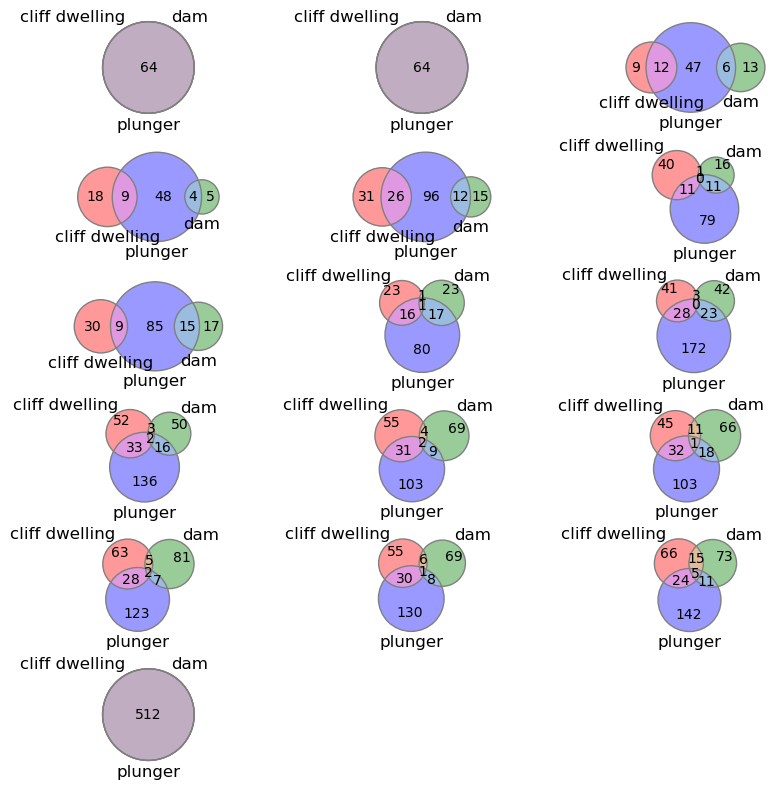

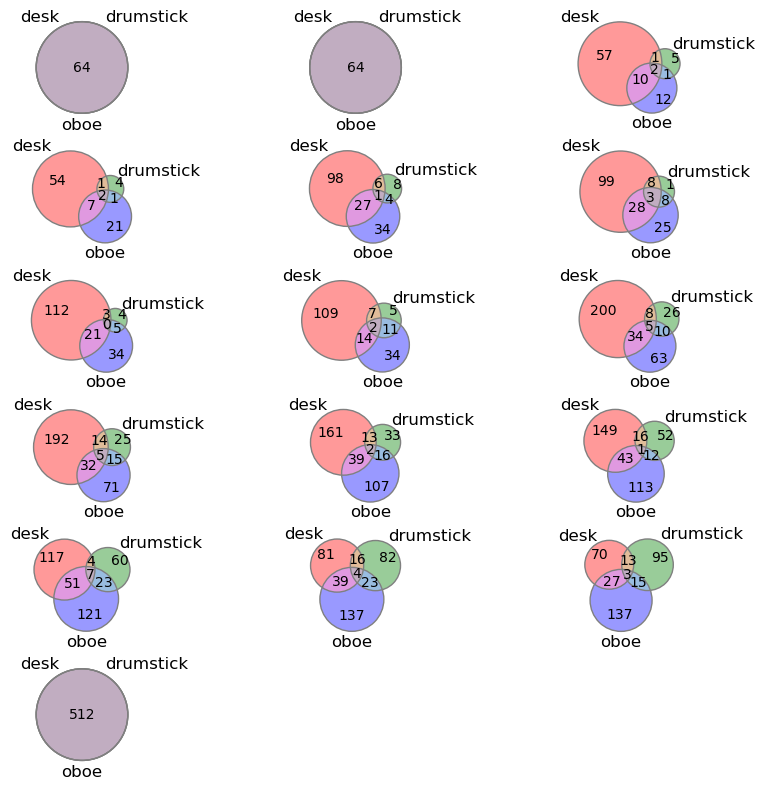

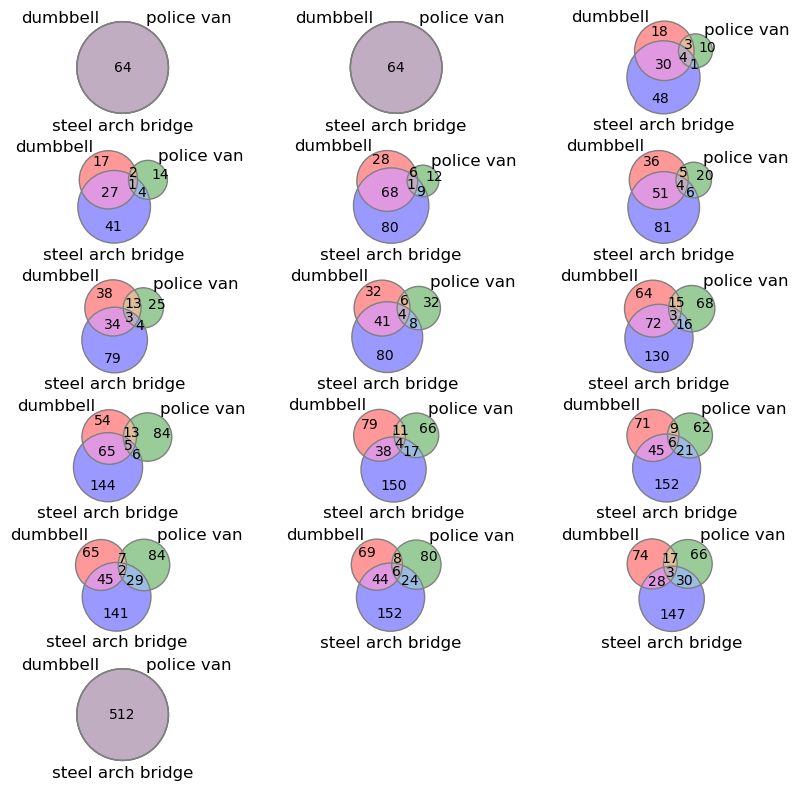

In [14]:
from matplotlib_venn import venn3, venn3_circles

my_dpi=100
# origin = [64, 64, 128, 128, 256, 256, 512, 512, 512, 512]
origin = [64, 64, 128, 128, 256, 256, 256, 256, 512, 512, 512, 512, 512, 512,512, 512]

for p in part:
    fig = plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

    cls_0_name = p[0].split('_')[-2]
    cls_1_name = p[1].split('_')[-2]
    cls_2_name = p[2].split('_')[-2]

    print(f"Class 0 : {cls_0_name}\nClass 1 : {cls_1_name}\nClass 2 : {cls_2_name}")

    cls_0_idx = load_pkl(p[0])
    cls_1_idx = load_pkl(p[1])
    cls_2_idx = load_pkl(p[2])
    

    for i, (c0, c1, c2, ori) in enumerate(zip(cls_0_idx, cls_1_idx, cls_2_idx, origin)):
        c0 = set(c0)
        c1 = set(c1)
        c2 = set(c2)
        
        itersect = c0.intersection(c1).intersection(c2)
        
        v0 = len(c0 - c1 - c2)                         # only 0
        v1 = len(c1 - c0 - c2)                         # only 1
        v2 = len(c0.intersection(c1) - itersect)                  # 0 and 1
        v3 = len(c2 - c0 - c1)                         # only 2
        v4 = len(c0.intersection(c2) - itersect)                  # 0 and 2
        v5 = len(c1.intersection(c2) - itersect)                  # 1 and 2
        v6 = len(itersect) # 0 and 1 and 2
        
        ax = fig.add_subplot(6, 3, i + 1)
        
        v=venn3(subsets = (v0, v1, v2, v3, v4, v5, v6), set_labels = (cls_0_name, cls_1_name, cls_2_name))
        c=venn3_circles(subsets = (v0, v1, v2, v3, v4, v5, v6), linestyle='-', linewidth=1, color="grey")
        ax.plot()
        
    plt.savefig(f'./result/imagenet_224_2/{cls_0_name}_{cls_1_name}_{cls_2_name}.png', dpi=my_dpi)